# Superenergy flux of Einstein - Rosen waves by Dominguez & Gallegos
##  Geoff Cope
##  Univeristy of Utah
##  December 30, 2021 

Here we concentrate on metric 16.  Separation of variables is done for the field equations.  Currently, arbitrary conditions are picked, we will go back and do these properly another time.

https://ui.adsabs.harvard.edu/abs/2018IJMPD..2750072D/abstract

Here's a useful link for Bessel functions

https://sudonull.com/post/31698-Bessel-Functions-in-SymPy-Symbolic-Math-Program

In [1]:
from sympy import init_session
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.8.8-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/



In [2]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [3]:
t,rho,phi,z,dt,drho,dphi,dz = symbols('t rho phi z dt drho dphi dz')

In [4]:
K = Function('K')(rho,t)
K

In [5]:
U = Function('U')(rho,t)
U

In [6]:
variables = Matrix([t,rho,phi,z])
variables

⎡t⎤
⎢ ⎥
⎢ρ⎥
⎢ ⎥
⎢φ⎥
⎢ ⎥
⎣z⎦

In [7]:
differentials = Matrix([dt,drho,dphi,dz])
differentials 

⎡ dt ⎤
⎢    ⎥
⎢drho⎥
⎢    ⎥
⎢dphi⎥
⎢    ⎥
⎣ dz ⎦

In [8]:
lineElement = expand( exp(2*(K-U)) * (dt**2 - drho**2) - exp(2*U)*dz**2 - exp(-2*U)*rho**2*dphi**2 )
lineElement

In [9]:
g = zeros(4)

for i in range(4):
    for j in range(4):
        if i == j:
            g[i,j] = lineElement.coeff( differentials[i],2 ) 
        else:
            g[i,j] = Rational(1,2)*lineElement.coeff( differentials[i]*differentials[j],1 )
            
g

⎡ 2⋅K(ρ, t)  -2⋅U(ρ, t)                                                       ⎤
⎢ℯ         ⋅ℯ                       0                    0              0     ⎥
⎢                                                                             ⎥
⎢                          2⋅K(ρ, t)  -2⋅U(ρ, t)                              ⎥
⎢          0             -ℯ         ⋅ℯ                   0              0     ⎥
⎢                                                                             ⎥
⎢                                                   2  -2⋅U(ρ, t)             ⎥
⎢          0                        0             -ρ ⋅ℯ                 0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅U(ρ, t)⎥
⎣          0                        0                    0         -ℯ         ⎦

In [10]:
import sympy

In [11]:
m = sympy.Array(g)
m

⎡ 2⋅K(ρ, t)  -2⋅U(ρ, t)                                                       ⎤
⎢ℯ         ⋅ℯ                       0                    0              0     ⎥
⎢                                                                             ⎥
⎢                          2⋅K(ρ, t)  -2⋅U(ρ, t)                              ⎥
⎢          0             -ℯ         ⋅ℯ                   0              0     ⎥
⎢                                                                             ⎥
⎢                                                   2  -2⋅U(ρ, t)             ⎥
⎢          0                        0             -ρ ⋅ℯ                 0     ⎥
⎢                                                                             ⎥
⎢                                                                    2⋅U(ρ, t)⎥
⎣          0                        0                    0         -ℯ         ⎦

In [12]:
from einsteinpy.symbolic import *

In [13]:
syms = sympy.symbols("t rho phi z")
t,rho,phi,z = syms

In [14]:
metric = MetricTensor(m,syms)

In [15]:
ch = ChristoffelSymbols.from_metric(metric)
simplify(ch.tensor())

⎡⎡∂             ∂            ∂             ∂                                                                            ⎤  ⎡∂            
⎢⎢──(K(ρ, t)) - ──(U(ρ, t))  ──(K(ρ, t)) - ──(U(ρ, t))               0                                0                 ⎥  ⎢──(K(ρ, t)) -
⎢⎢∂t            ∂t           ∂ρ            ∂ρ                                                                           ⎥  ⎢∂ρ           
⎢⎢                                                                                                                      ⎥  ⎢             
⎢⎢∂             ∂            ∂             ∂                                                                            ⎥  ⎢∂            
⎢⎢──(K(ρ, t)) - ──(U(ρ, t))  ──(K(ρ, t)) - ──(U(ρ, t))               0                                0                 ⎥  ⎢──(K(ρ, t)) -
⎢⎢∂ρ            ∂ρ           ∂t            ∂t                                                                           ⎥  ⎢∂t           
⎢⎢                                

In [16]:
Ric = RicciTensor.from_metric(metric)
Ric.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞                                                        
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                                      
⎢ρ⋅⎜───(K(ρ, t)) - ───(K(ρ, t)) - ───(U(ρ, t)) - 2⋅⎜──(U(ρ, t))⎟  + ───(U(ρ, t))⎟ + ──(K(ρ, t)) - ──(U(ρ, t))                            
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂ρ            ∂ρ                                     
⎢  ⎝∂ρ             ∂t             ∂ρ                                ∂t          ⎠                                                        
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────                            
⎢                                                     ρ                                                                                  
⎢                                 

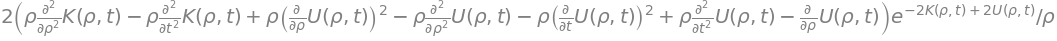

In [17]:
R = RicciScalar.from_riccitensor(Ric)
R.simplify()
R.expr

In [18]:
einst = EinsteinTensor.from_metric(metric)
einst.tensor()

⎡  ⎛  2              2              2                           2     2         ⎞                               ⎛    2                2  
⎢  ⎜ ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂             ⎜   ∂                ∂   
⎢ρ⋅⎜───(K(ρ, t)) - ───(K(ρ, t)) - ───(U(ρ, t)) - 2⋅⎜──(U(ρ, t))⎟  + ───(U(ρ, t))⎟ + ──(K(ρ, t)) - ──(U(ρ, t))   ⎜ρ⋅───(K(ρ, t)) - ρ⋅───(K
⎢  ⎜  2              2              2              ⎝∂t         ⎠      2         ⎟   ∂ρ            ∂ρ            ⎜    2                2  
⎢  ⎝∂ρ             ∂t             ∂ρ                                ∂t          ⎠                               ⎝  ∂ρ               ∂t   
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────── - ─────────────────────────
⎢                                                     ρ                                                                                  
⎢                                 

In [19]:
#  rm1 = RiemannCurvatureTensor.from_christoffels(ch)
#  rm1.tensor()

In [20]:
#  weyl = WeylTensor.from_metric(metric)
#  weyl.tensor()

In [21]:
ricciSimplified = simplify(Ric.tensor())
ricciSimplified

⎡    ⎛    2              2              2                           2     2         ⎞                                                    
⎢    ⎜   ∂              ∂              ∂               ⎛∂          ⎞     ∂          ⎟   ∂             ∂                                  
⎢- ρ⋅⎜- ───(K(ρ, t)) + ───(K(ρ, t)) + ───(U(ρ, t)) + 2⋅⎜──(U(ρ, t))⎟  - ───(U(ρ, t))⎟ + ──(K(ρ, t)) - ──(U(ρ, t))                        
⎢    ⎜    2              2              2              ⎝∂t         ⎠      2         ⎟   ∂ρ            ∂ρ                                 
⎢    ⎝  ∂ρ             ∂t             ∂ρ                                ∂t          ⎠                                                    
⎢────────────────────────────────────────────────────────────────────────────────────────────────────────────────                        
⎢                                                       ρ                                                                                
⎢                                 

In [22]:
einsteinSimplifed = simplify(einst.tensor())
einsteinSimplifed

⎡                                        ∂                                               ∂                                               
⎢               2                2   1.0⋅──(K(ρ, t))                                     ──(K(ρ, t))                                     
⎢  ⎛∂          ⎞    ⎛∂          ⎞        ∂ρ                    ∂           ∂             ∂t                                              
⎢- ⎜──(U(ρ, t))⎟  - ⎜──(U(ρ, t))⎟  + ───────────────       - 2⋅──(U(ρ, t))⋅──(U(ρ, t)) + ───────────                                     
⎢  ⎝∂ρ         ⎠    ⎝∂t         ⎠           ρ                  ∂ρ          ∂t                 ρ                                          
⎢                                                                                                                                        
⎢                                   ∂                                                         ∂                                          
⎢                                 

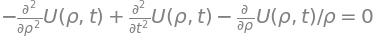

In [23]:
equation18 = Eq(expand((-1/rho)*ricciSimplified[2,2].args[1]),0)
equation18

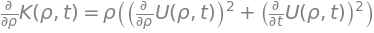

In [24]:
equation19a = Eq( diff(K,rho),solve( einsteinSimplifed[0,0] , diff(K,rho) )[0] )
equation19a

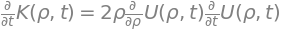

In [25]:
equation19b = Eq(diff(K,t), solve( einsteinSimplifed[1,0] , diff(K,t) )[0] ) 
equation19b

In [26]:
vacuumFieldEquations = Matrix([equation18,equation19a,equation19b])
vacuumFieldEquations

/opt/anaconda3/lib/python3.8/site-packages/sympy/matrices/repmatrix.py:98: SymPyDeprecationWarning: 

non-Expr objects in a Matrix has been deprecated since SymPy 1.9. Use
list of lists, TableForm or some other data structure instead. See
https://github.com/sympy/sympy/issues/21497 for more info.

  SymPyDeprecationWarning(


⎡                                 ∂               ⎤
⎢     2              2            ──(U(ρ, t))     ⎥
⎢    ∂              ∂             ∂ρ              ⎥
⎢ - ───(U(ρ, t)) + ───(U(ρ, t)) - ─────────── = 0 ⎥
⎢     2              2                 ρ          ⎥
⎢   ∂ρ             ∂t                             ⎥
⎢                                                 ⎥
⎢                ⎛             2                2⎞⎥
⎢∂               ⎜⎛∂          ⎞    ⎛∂          ⎞ ⎟⎥
⎢──(K(ρ, t)) = ρ⋅⎜⎜──(U(ρ, t))⎟  + ⎜──(U(ρ, t))⎟ ⎟⎥
⎢∂ρ              ⎝⎝∂ρ         ⎠    ⎝∂t         ⎠ ⎠⎥
⎢                                                 ⎥
⎢    ∂                 ∂           ∂              ⎥
⎢    ──(K(ρ, t)) = 2⋅ρ⋅──(U(ρ, t))⋅──(U(ρ, t))    ⎥
⎣    ∂t                ∂ρ          ∂t             ⎦

In [27]:
from sympy import *

In [28]:
X, Y = map(Function, 'XY')

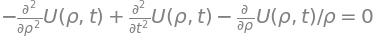

In [29]:
eq = vacuumFieldEquations[0]
eq

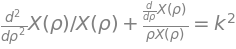

In [30]:
xODE = Eq(pde_separate( eq, U, [X(rho),Y(t)])[0] , k**2 ) 
xODE

In [31]:
xSolution = dsolve( xODE , X(rho))
xSolution 

In [34]:
xSolutionParticular = xSolution.subs(xSolution.args[1].args[0].args[0],1).subs(xSolution.args[1].args[1].args[0],1)
xSolutionParticular

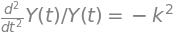

In [32]:
yODE = Eq( pde_separate( eq, U, [X(rho),Y(t)])[1] , - k**2 ) 
yODE

In [33]:
ySolution = dsolve( yODE , Y(t))
ySolution

In [35]:
ySolutionParticular = ySolution.subs(ySolution.args[1].args[0].args[0],1).subs(ySolution.args[1].args[1].args[0],1)
ySolutionParticular

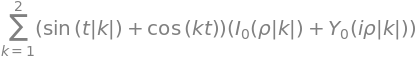

In [36]:
#  Here we arbitrary pick just two terms as an example... 
Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) )

In [38]:
psiSumTwoTerms = Eq(U, Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 
psiSumTwoTerms

In [39]:
expand( Sum( ( xSolutionParticular.args[1] * ySolutionParticular.args[1] ) ,(k,1,2) ).doit() ) 

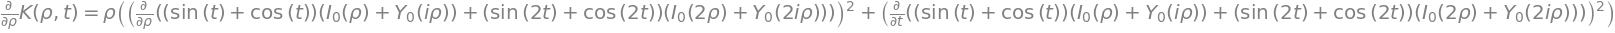

In [40]:
dKdrhoPDE = vacuumFieldEquations[1].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dKdrhoPDE

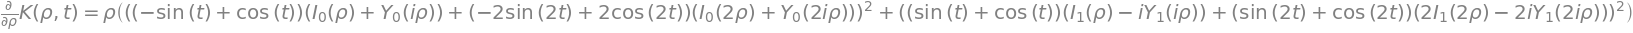

In [41]:
dKdrhoPDE.doit()

In [42]:
#  pdsolve( dKdrhoPDE )

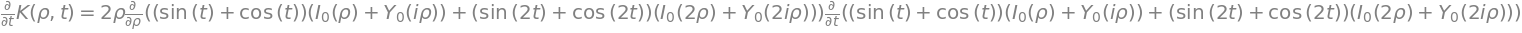

In [43]:
dKdtPDE = vacuumFieldEquations[2].subs(psiSumTwoTerms.args[0],psiSumTwoTerms.args[1])
dKdtPDE

In [44]:
#  pdsolve( dgammadtPDE )